In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/selin/Desktop/MA.csv")
df.head()
x = df["x"]
x_pred = np.full(x.shape, np.nan)
## nan = not a number

x_pred[5] = np.mean(x[2:5])
k = 3
for t in range(k, x.size):
    x_pred[t] = np.mean(x[(t-k):t])
print(x_pred)

[        nan         nan         nan  2.15662099  1.99002841  2.31918294
  1.82792834  1.0528599   0.88495105  0.66432761  0.51086167 -0.33130941
 -0.89600296 -0.74673873 -0.90894327 -0.75272085 -0.85365865 -1.30668877
 -1.2672468  -1.63843148 -1.6050957  -2.09776901 -2.43607392 -2.30588963
 -2.43313566 -2.34325805 -1.84655762 -1.59511787 -1.49008306 -1.32139011
 -0.81764605 -0.4797242  -0.11153781 -0.14433395  0.0231234  -0.4753993
 -0.88558865 -0.79044814 -0.54052593 -0.60687774 -1.43263197 -1.56774959
 -1.95880384 -1.04280358 -0.62639413  0.67219964  0.32637733 -0.21499761
 -0.66450863 -0.56740567]


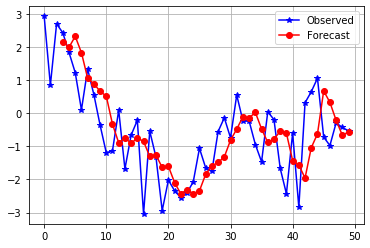

In [35]:
def ma(x,k):
    x_pred = np.full(x.shape, np.nan)
    for t in range(k, x.size):
        x_pred[t] = np.mean(x[(t-k):t])
    return x_pred

x_f = ma(x,3)
plt.plot(x,"-*b")
plt.plot(x_pred, "-or")
plt.grid(True)
plt.legend(["Observed","Forecast"])

In [36]:
#mean squared error
def mse(y,y_pred):
    return np.mean((y-y_pred)**2)

print(mse(x,x_f))

1.0299287087814082


In [38]:
#mean absolute percentage error
def mape(y, y_pred):
    return np.mean(np.abs(y-y_pred)/np.abs(y))*100
print(mape(x,x_f))

214.5381795378886


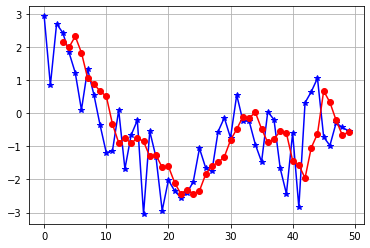

In [41]:
# weighted moving average


def wma(x,w):
    x_pred = np.full(x.shape, np.nan)
    k = len(w)
    for t in range(k, x.size):
        x_pred[t] = np.sum(x[t-k:t]*w[::-1])
    return x_pred

x_f = wma(x,[0.5, 0.3, 0.2])
plt.plot(x,"-*b")
plt.plot(x_pred, "-or")
plt.grid(True)
